
    Actual     Predicted
0      769  -2913.891945
1     3356   2181.213253
2       50   1978.049049
3     1345  -1567.167300
4      455  -3771.587562
5    71066  70871.488153
6    26547  27746.571205
7    51191  49834.881493
8    78761  80956.966254
9    23105  28003.166053
10   46896  45873.055344
11   16673  19820.041118
12    7902  10686.713105
13   44587  43805.114946
14   38571  39717.599593
15       0   -275.549173
16       0  -2885.397925

R2 Score: 0.9905141070561774



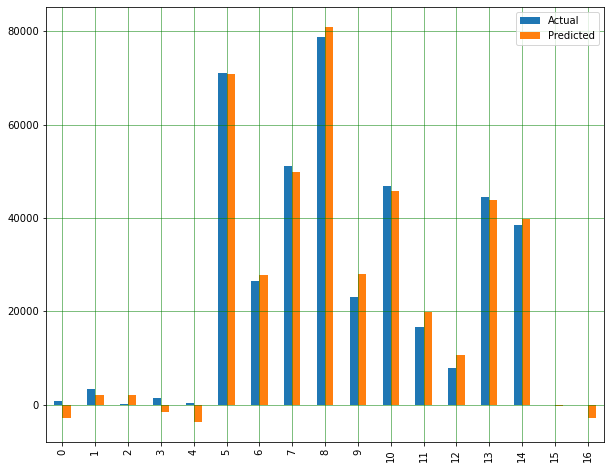

-Algorithm Performance Evaluation-
Mean Absolute Error: 2106.6439466652228
Mean Squared Error: 6245206.281039764
Root Mean Squared Error: 2499.0410722994857


In [27]:
# make predictions

import numpy as np
import pandas as pd

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

#display linear regression data visualization
import matplotlib.pyplot as plt 

# Load dataset
# updated daily data from NY Times
# url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
# names = ['date', 'cases', 'deaths']

# read data from local file
dataset = pd.read_csv('gmr_plus_covid.csv')
#print (dataset)
#print (dataset.describe())

# null check
#print("Null Check - all values should return false")
#print(dataset.isnull().any())

# read in data from hyperlink
#dataset = read_csv(url)

# set up data and reshape
# x = features
x = dataset[['cases',
            'retail_and_recreation_percent_change_from_baseline',
            'retail_and_recreation_percent_change_from_baseline',
            'grocery_and_pharmacy_percent_change_from_baseline',
            'parks_percent_change_from_baseline',
            'transit_stations_percent_change_from_baseline',
            'workplaces_percent_change_from_baseline',
            'residential_percent_change_from_baseline']].values
# y = target variables
y = dataset['deaths'].values

# Convert date to numerical value for use in Regression
#import datetime as dt
#x['Date'] = pd.to_datetime(x['Date'])
#x['Date'] = x['Date'].map(dt.datetime.toordinal)

# Split up data into train and validation/test
# First 80% of data assigned to training, 20% for testing, adjust with test_size
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.20, random_state=1)

# Training the Model
x_train = np.array(x_train)
y_train = np.array(y_train)
x_validation = np.array(x_validation)
y_validation = np.array(y_validation)

# Make predictions on validation dataset
#model = SVC(gamma='auto')
#model.fit(x_train, y_train)
#predictions = model.predict(x_validation)

# Evaluate predictions
#print(accuracy_score(y_validation, predictions))
#print(confusion_matrix(y_validation, predictions))
#print(classification_report(y_validation, predictions))

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)

# make predictions on the test data
y_pred = clf.predict(x_validation)

#Comparing actual output values for x_test with predicted values (compring y_test to y_pred)
df = pd.DataFrame({'Actual': y_validation.flatten(), 'Predicted': y_pred.flatten()})
print("")
print(df)

# Assess how good model is by comparing Predictions (y_pred) to real target values for test set (y_validation)
# calculate and display r2 score for model accuracy
print("")
print('R2 Score:',r2_score(y_validation,y_pred))
print("")

#print("")
#print("For every one unit of change in Cases, 
#       the change in Deaths is: %s percent" %(clf.coef_ * 100))

#coeff_df = pd.DataFrame(clf.coef_, x.columns, columns=['Coefficient'])  
#print(coeff_df)

#y_plot = []
#for i in range(10):
#   y_plot.append(y_pred)
#plt.figure(figsize=(6,6))
#plt.scatter(x_validation,y_validation,color='red',label='Cases')
#plt.plot(x_validation, y_pred, color='black', label='Prediction')
#plt.xlabel('cases')
#plt.ylabel('deaths')
#plt.legend()
#plt.show()

df = pd.DataFrame({'Actual': y_validation, 'Predicted': y_pred})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print("-Algorithm Performance Evaluation-")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_validation, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_validation, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validation, y_pred)))
